In [42]:
import pandas as pd
import math
import matplotlib.pyplot as plt

In [6]:
def make_map(size):
    fld = [
        [ 0.0 for r in range(size) ] for c in range(size)
    ]
    return fld

In [7]:
def showmap(fld):
    xlen = len(fld[0])
    ylen = len(fld)
    df = pd.DataFrame(columns=range(xlen), index=range(ylen), data=fld).T
    df = df.sort_index(ascending=False)
    plt.figure(figsize=(10,10))
    plt.imshow(df)

In [8]:
fld = make_map(64)

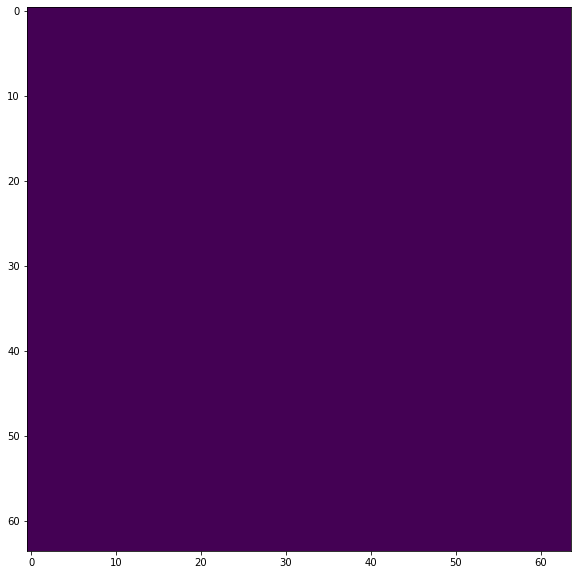

In [9]:
showmap(fld)

In [103]:
MAXINT=int(1e31)
def cmp(x,y):
    return -1 if x < y else 1
def fint(x):
    #return round(x)
    if x > 0:
        return int(x+1e-4)
    else:
        return int(x-1e-4)
def follow(vec, d):
    global MAXINT
    dsqr = d * d
    x,y = vec
    xa = abs(x)
    ya = abs(y)
    xs = cmp(x,0)
    ys = cmp(y,0)
    xi = 0
    yi = 0
    if xa > ya:
        r = ya / xa
        while xi*xi + yi*yi < dsqr:
            yield (xs * xi, ys * fint(yi))
            xi += 1
            yi += r
    else:
        r = xa / ya
        while xi*xi + yi*yi < dsqr:
            yield (xs * fint(xi), ys * yi)
            yi += 1
            xi += r        

def clamp(nv, nmin, nmax):
    if nv < nmin: nv = nmin
    if nv > nmax: nv = nmax
    return nv

def enlighten(p):
    p = 1 - ((1-p)*3/8)
    return p

def range_shader(x,y):
    return 20-math.log(x*x+y*y+1)
            
def spill_light(fld, pt, vec, d): 
    x0, y0 = pt
    for x,y in follow(vec, d):
        #print(x0, x, y0, y)
        if fld[x0+x][y0+y] == 0.77:
            break
        else:
            #fld[x0+x][y0+y] = enlighten(fld[x0+x][y0+y]+0.1)
            fld[x0+x][y0+y] = range_shader(x,y)
    

In [104]:
fint(-0.99999)

-1

In [105]:
list(follow((1,4), 8))

[(0, 0), (0, 1), (0, 2), (0, 3), (1, 4), (1, 5), (1, 6), (1, 7)]

In [106]:
def fraction(n,m):
    if n == 0:
        return (1,0)
    while n % 2 == 0:
        n //= 2
        m //= 2
        if n == 1: break
    return (n,m)
def vecs(m=64):
    tmp  = [ fraction(i,m) for i in range(m+1) ]
    for xs,ys in [(1,1), (-1, -1)]:
        for x,y in tmp:
            yield (xs * x, ys * y)
            if x != y and x != 0 and y != 0:
                yield (ys * y, xs * x)
        for x,y in tmp:
            yield (-ys * y, xs * x)
            if x != y and x != 0 and y != 0:
                yield (xs * x, -ys * y)
        

In [107]:
list(vecs(2))

[(1, 0),
 (1, 2),
 (2, 1),
 (1, 1),
 (0, 1),
 (-2, 1),
 (1, -2),
 (-1, 1),
 (-1, 0),
 (-1, -2),
 (-2, -1),
 (-1, -1),
 (0, -1),
 (2, -1),
 (-1, 2),
 (1, -1)]

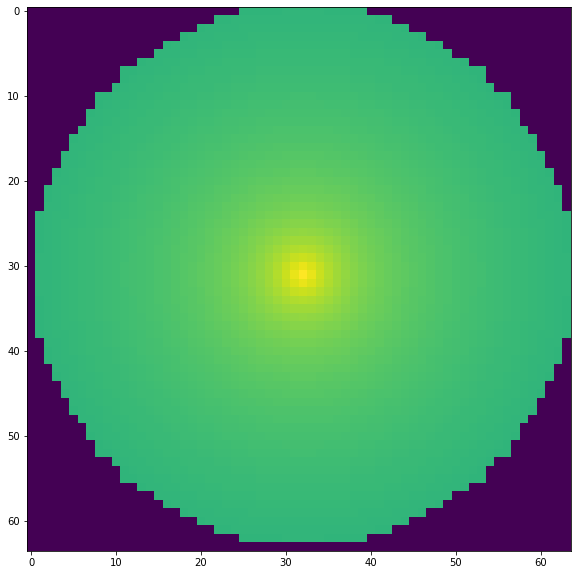

In [108]:
fld = make_map(64)
pt = (32, 32)
d = 32
#spill_light(fld, pt, (1,0), d)
#spill_light(fld, pt, (1,1), d)
#spill_light(fld, pt, (2,1), d)
#spill_light(fld, pt, (1,2), d)
for v in vecs(32):
    spill_light(fld, pt, v, d)
showmap(fld)

In [109]:
list(vecs(2))

[(1, 0),
 (1, 2),
 (2, 1),
 (1, 1),
 (0, 1),
 (-2, 1),
 (1, -2),
 (-1, 1),
 (-1, 0),
 (-1, -2),
 (-2, -1),
 (-1, -1),
 (0, -1),
 (2, -1),
 (-1, 2),
 (1, -1)]

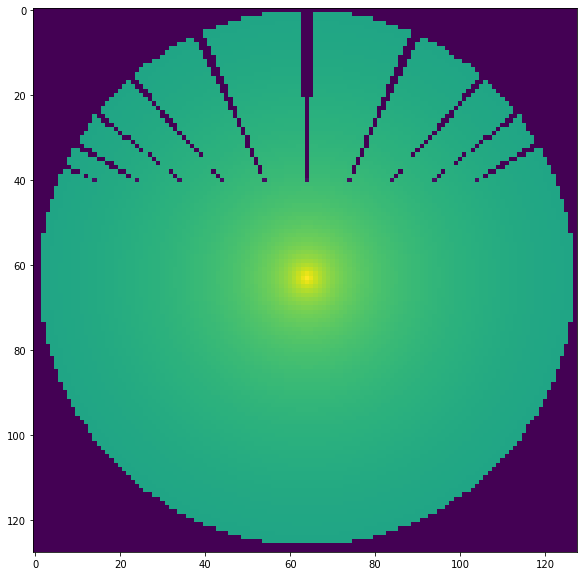

In [110]:
SIZE=128
fld = [
    [ 0.0 for r in range(SIZE) ] for c in range(SIZE)
]



pt = (SIZE//2, SIZE//2)

for i in range(pt[0]-50, pt[0]+50, 10):
    fld[i][pt[1]+23] = 0.77
    
d = 63
#spill_light(fld, pt, (-3,4), d)
#spill_light(fld, pt, (-1,2), d)
#spill_light(fld, pt, (-1,1), d)
#spill_light(fld, pt, (-1,4), d)
#spill_light(fld, pt, (0, 1), d)
#spill_light(fld, pt, (-1, 0), d)
for v in vecs(64):
    spill_light(fld, pt, v, d)
#fld[pt[0]][pt[1]] = 0.2
showmap(fld)

In [111]:
def illuminate(fld, pt, d):
    origin = pt
    for vec in vecs(d):
        spill_light(fld, origin, vec, d)


In [112]:
fld = make_map(256)
illuminate(fld, (128,128), 128)

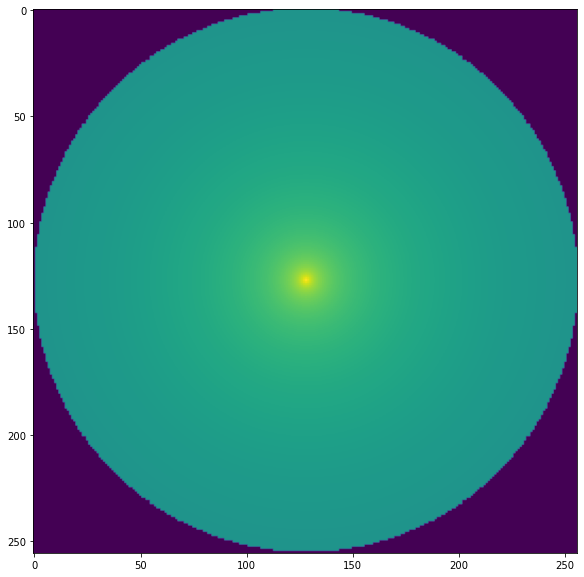

In [113]:
showmap(fld)

In [54]:
max(fld)

[0.0,
 127.88275880665071,
 126.8897158953396,
 125.89678312014172,
 124.90396310766124,
 123.9112585683803,
 122.9186723000212,
 121.92620719107111,
 120.93386622447825,
 119.94165248152953,
 118.94956914591998,
 117.957619508025,
 116.96580696938743,
 115.97413504743201,
 114.9826073804208,
 113.99122773266372,
 113.0,
 112.00892821556681,
 111.01801655587259,
 110.0272693471941,
 109.03669107231748,
 108.04628637764465,
 107.05606008068857,
 106.06601717798213,
 105.07616285342742,
 104.08650248711405,
 103.0970416646375,
 102.1077861869505,
 101.11874208078342,
 100.12991560967181,
 99.14131328563285,
 98.15294188153507,
 97.16480844420988,
 96.17692030835673,
 95.1892851112981,
 94.2019108086455,
 93.2148056909416,
 92.22797840135064,
 91.2414379544733,
 90.2551937563706,
 89.26925562588724,
 88.28363381737297,
 87.29833904490967,
 86.31338250816034,
 85.32877591996736,
 84.34453153583817,
 83.3606621854697,
 82.37718130647589,
 81.39410298049853,
 80.4114419718985,
 79.4292137692

In [115]:
len(list(vecs(64)))

512